## 1- import and reading data

In [1]:
import sys

sys.path.append('../../../scripts/utilities')
from helper_functions import *

sys.path.append('../../../scripts/data_preprocessing')
from data_reduction import *

In [2]:
base_path = '../../../data/processed_data/'
df1 = read_files('df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated.csv',
                 base_path=base_path)[0]

## 2- extract X and y from normalized dataset

In [3]:
target_features = ['MCQ160L', 'MCQ220']
y_1 = df1[target_features[0]]
y_2 = df1[target_features[1]]
y = df1[target_features]
X = df1.drop(columns=target_features)

## 3- perform PCA

__find optimal num components of PCA base first target__

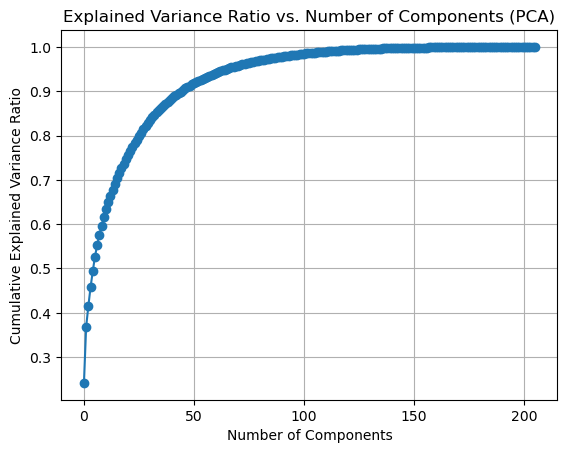

Optimal Number of Components (PCA): 66
Explained Variance Ratio: [0.24178342 0.12651797 0.04672094 0.04270525 0.03566907 0.03324214
 0.02585148 0.02342009 0.02080509 0.01892331 0.01811191 0.01552837
 0.0145745  0.01427063 0.01274349 0.01258094 0.01158807 0.01109942
 0.01036237 0.01008392 0.00931306 0.00906676 0.00882171 0.00853496
 0.00828955 0.0080825  0.00804356 0.00767625 0.00718541 0.00704235
 0.00672885 0.0060128  0.00574133 0.0054903  0.00527855 0.00500726
 0.0048164  0.00444597 0.00426615 0.0041032  0.00404066 0.00387407
 0.003681   0.00365979 0.00360379 0.00346752 0.00338471 0.0032321
 0.00301838 0.0029674  0.00282446 0.00267693 0.00257575 0.00249796
 0.00240789 0.00235473 0.00231279 0.00220204 0.00212926 0.00203671
 0.00200335 0.00189556 0.00189061 0.00180896 0.00169951 0.00168387]


In [4]:
pca_optimal_num_components1, explained_variance_ratio1 = find_optimal_num_components(X,y_1, method='PCA')

__find optimal num components of PCA base second target__

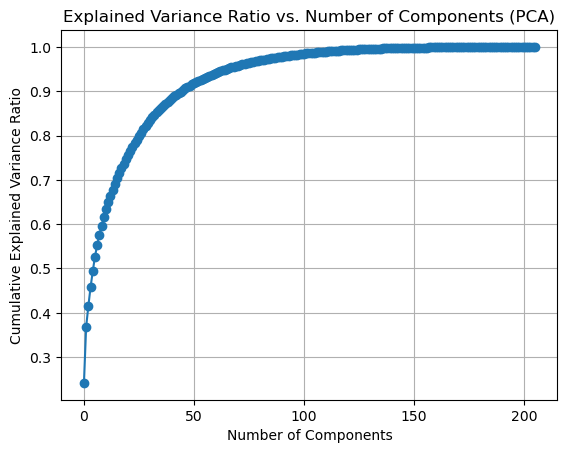

Optimal Number of Components (PCA): 66
Explained Variance Ratio: [0.24178342 0.12651797 0.04672094 0.04270525 0.03566907 0.03324214
 0.02585148 0.02342009 0.02080509 0.01892331 0.01811191 0.01552837
 0.0145745  0.01427063 0.01274349 0.01258094 0.01158807 0.01109942
 0.01036237 0.01008392 0.00931306 0.00906676 0.00882171 0.00853496
 0.00828955 0.0080825  0.00804356 0.00767625 0.00718541 0.00704235
 0.00672885 0.0060128  0.00574133 0.0054903  0.00527855 0.00500726
 0.0048164  0.00444597 0.00426615 0.0041032  0.00404066 0.00387407
 0.003681   0.00365979 0.00360379 0.00346752 0.00338471 0.0032321
 0.00301838 0.0029674  0.00282446 0.00267693 0.00257575 0.00249796
 0.00240789 0.00235473 0.00231279 0.00220204 0.00212926 0.00203671
 0.00200335 0.00189556 0.00189061 0.00180896 0.00169951 0.00168387]


In [5]:
pca_optimal_num_components2, explained_variance_ratio2 = find_optimal_num_components(X,y_2, method='PCA')

__perform pca with optimal num components base on first target__

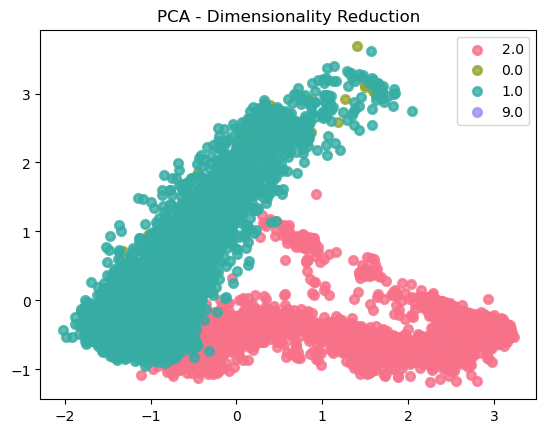

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,0.579869,2.607962,-0.013729,0.039563,-0.744653,0.386341,0.037244,-0.633377,0.029507,0.154682,...,0.054431,-0.153853,-0.002764,-0.004030,0.089832,-0.004870,0.001455,0.038527,0.046299,0.154483
1,-0.207876,1.176554,-0.151006,0.044439,0.043828,-0.148279,-0.517354,1.107609,0.683594,0.335853,...,-0.072913,0.039093,-0.021890,0.021695,0.033390,0.083776,-0.028578,0.091581,0.324994,-0.011153
2,-1.160681,-0.105902,-0.726604,-0.348981,0.098982,0.323604,-0.448544,0.006617,-0.228719,-0.336927,...,0.070593,0.100094,0.165682,0.002279,-0.087522,0.127069,0.001894,-0.165170,0.003933,0.087043
3,1.201291,-0.378371,0.793986,-0.518685,-0.482912,0.520330,-0.479838,0.040815,0.180371,0.046693,...,-0.184727,-0.275651,0.165651,-0.379362,0.135325,0.107728,0.267269,-0.172485,0.110072,0.114969
4,-0.190038,1.542929,0.182044,-0.742998,0.143934,1.109309,-0.782554,0.807525,-0.556021,-0.230332,...,0.101264,0.061018,0.244378,-0.101412,-0.077684,-0.011185,-0.080581,0.344224,-0.173041,-0.024413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,-0.630082,0.024536,-0.147324,-0.007330,-0.215834,-0.122883,-0.339623,-0.453858,0.829814,-0.652549,...,0.008940,0.037157,0.028084,0.135057,0.038412,0.018314,-0.137709,0.017506,0.047421,0.003370
10171,2.491810,-0.119062,-1.212582,0.367382,-0.059432,-0.050249,0.837834,0.497645,-0.093188,-0.468152,...,-0.053755,-0.020193,-0.051834,0.141595,0.112299,-0.114722,-0.019294,0.058074,0.012771,0.002742
10172,-0.833141,0.157400,-0.086837,0.161475,1.094779,-0.534944,-0.108326,0.441728,-0.606661,0.277490,...,-0.009801,-0.049502,-0.137502,-0.163298,0.027376,-0.055159,-0.056305,0.027778,-0.097767,0.000266
10173,1.879839,-0.781854,0.963547,-0.097669,0.621928,-0.089720,0.126017,-0.134400,-0.408717,0.213327,...,0.055024,-0.061355,-0.102042,-0.003695,0.048391,-0.040967,-0.120174,0.130092,-0.019511,0.003811


In [6]:
plot_and_perform_dimensionality_reduction(X, y_1, target_names=df1[target_features[0]].unique(),
                              num_components=pca_optimal_num_components1, method='PCA')

__perform pca with optimal num components base on second target__

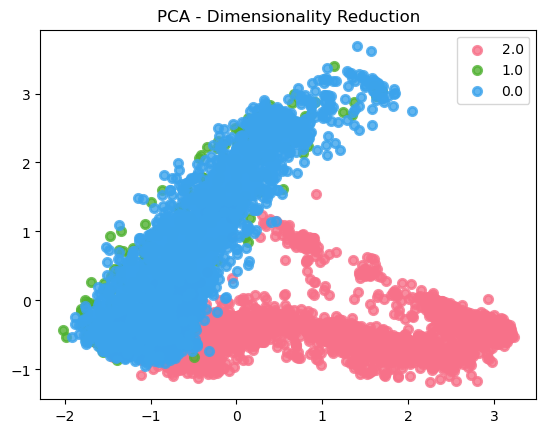

In [7]:
df_X_PCA = plot_and_perform_dimensionality_reduction(X, y_2, target_names=df1[target_features[1]].unique(),
                              num_components=pca_optimal_num_components2, method='PCA')

### save PCA dataframe

In [8]:
df_PCA = pd.concat([df_X_PCA, y], axis=1)
df_PCA.head()
save_files([df_PCA],'df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated_PCA_with_outliers.csv', base_path=base_path)

## 4- perform LDA

__find optimal num components of LDA base first target__

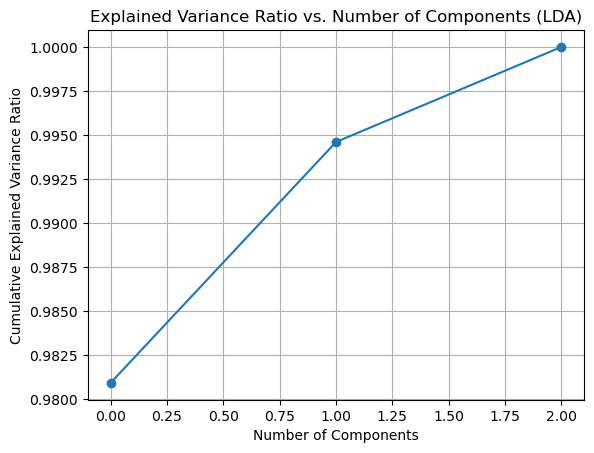

Optimal Number of Components (LDA): 1
Explained Variance Ratio: [0.98091853]


In [9]:
lda_optimal_num_components1, explained_variance_ratio1 = find_optimal_num_components(X, y_1, method='LDA')

__find optimal num components of LDA base second target__

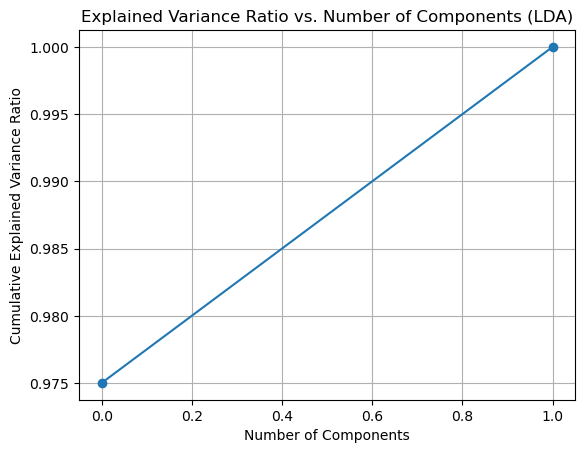

Optimal Number of Components (LDA): 1
Explained Variance Ratio: [0.97501452]


In [10]:
lda_optimal_num_components2, explained_variance_ratio2 = find_optimal_num_components(X, y_2, method='LDA')

__perform lda base on first target__

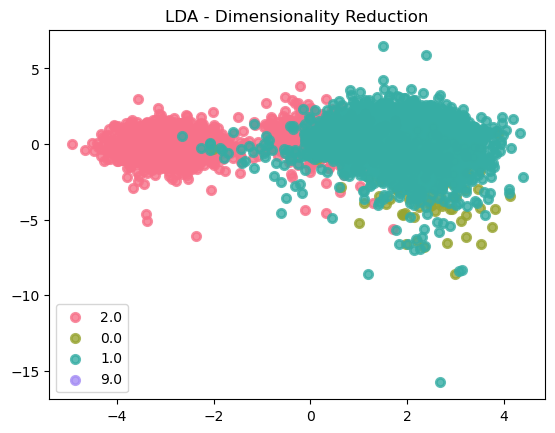

,0,1,2
0,2.785444,-1.197469,0.922295
1,2.027549,0.470228,-1.063487
2,2.288608,1.423697,-0.030661
3,-3.085442,1.000442,-0.452235
4,2.632196,3.008201,-1.888915
...,...,...,...
10170,0.601495,2.093654,-1.055259
10171,-2.942691,-0.197581,-0.614581
10172,2.662144,0.936323,0.835045
10173,-2.709285,-0.552068,1.028449


In [11]:
plot_and_perform_dimensionality_reduction(X, y_1, target_names=df1[target_features[0]].unique(),
                              num_components=lda_optimal_num_components1, method='LDA')

__perform lda base on second target__

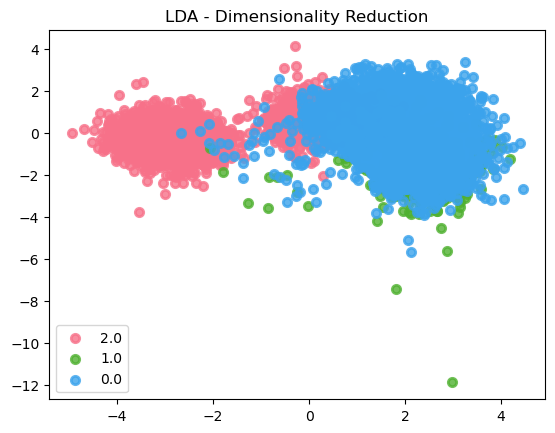

In [12]:
df_X_LDA=plot_and_perform_dimensionality_reduction(X, y_2, target_names=df1[target_features[1]].unique(),
                              num_components=lda_optimal_num_components2, method='LDA')

###  save LDA data frame

In [13]:
df_LDA = pd.concat([df_X_LDA, y], axis=1)
df_LDA.head()
save_files([df_LDA],'df_filling_missing_values_with_median_encoded_handle_noisy_normalized_highly_correlated_LDA_with_outliers.csv', base_path=base_path)